In [251]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Make the single feature model

Make the model with slope $\mathit{m}$ and intercept $\mathit{b}$. Add in some Gaussian noise to the data to make the problem a bit more interesting

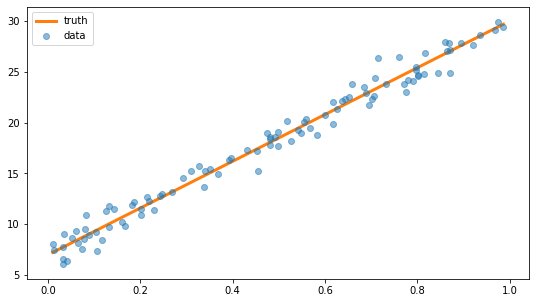

In [238]:
x = np.random.rand(100, 1)
m = 23
b = 7
y = b + (x * m) + np.random.randn(*x.shape)

plt.figure(figsize=(9, 5))
plt.plot(np.unique(x), b + np.unique(x) * m, 'C1', lw=3, label='truth')
plt.scatter(x, y, label='data', alpha=0.5, zorder=100)
plt.legend()
plt.show()

### Initialize the features and weights as column vectors

In [239]:
X = np.c_[np.ones_like(x), x]
W = np.random.randn(X.shape[1], 1)

### Perform gradient descent

In [240]:
n_iters = 100000
alpha = 0.01
for _ in range(n_iters):
    W -= (alpha/X.shape[0]) * np.dot(X.T, np.dot(X, W) - y)
print("Slope: {:>9.2f}\nIntercept: {:.2f}".format(W[1][0], W[0][0]))

Slope:     22.82
Intercept: 7.09


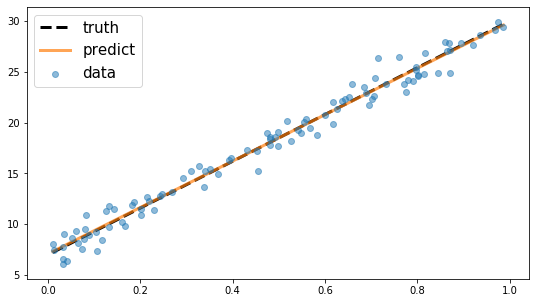

In [242]:
plt.figure(figsize=(9, 5))
plt.plot(np.unique(x), b + np.unique(x) * m,
         'k--', lw=3, label='truth')
plt.plot(np.unique(x), W[0] + np.unique(x) * W[1],
         'C1', lw=3, alpha=0.7, label='predict')
plt.scatter(x, y, label='data', alpha=0.5, zorder=100)
plt.legend(fontsize=15)
plt.show()

## Make a multiple feature model

Similar to the above problem, but this time we will have multiple features, and therefore multiple weights. I'll go ahead and incorporate the offset, $\mathit{b}$, into the weights vector and add the column of ones to the feature matrix.

In [247]:
X = np.random.rand(100, 4)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add the column of ones
m = np.array([7, 23, -4, -16, 9]).reshape(-1, 1)  # The first weight is the offset
# (100 x 5) . (5, 1) + (100, 1)
y = np.dot(X, m) + np.random.randn(X.shape[0], 1)

### Visualize each feature

This problem is slightly more difficult to visualize, but we can isolate each feature to plot against the target value and should recover the linear relationships after some translations (shifting mean to zero). We'll lose information about the offset, but we should be able to verify that the "data" are reasonably well described by the 4 relationships.

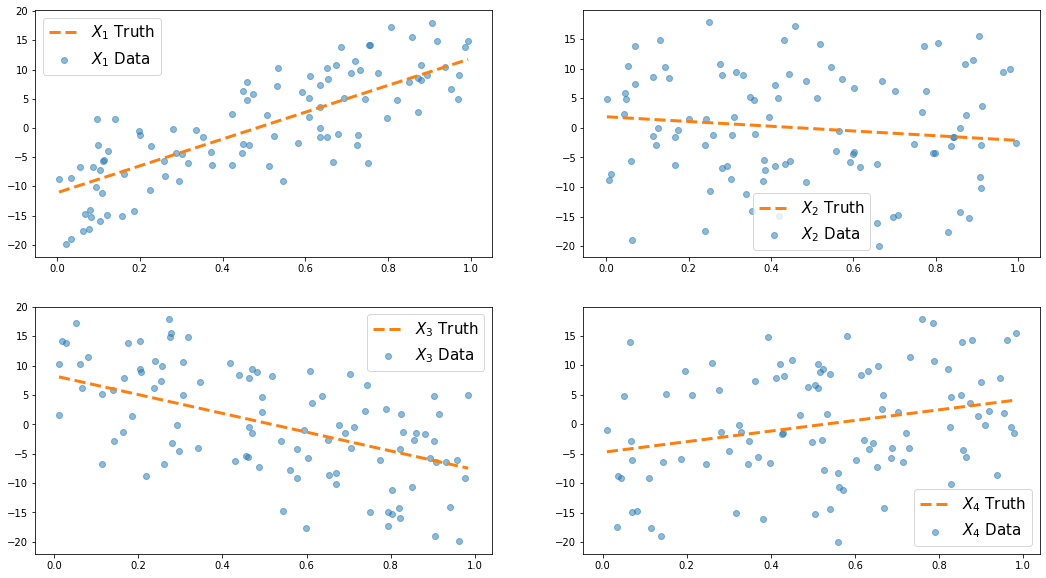

In [248]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
for i, ax in enumerate(axes.ravel()):
    x_vals = np.unique(X[:, i+1])
    ax.plot(x_vals, (x_vals * m[i+1]) - np.mean(x_vals * m[i+1]),
            'C1--', lw=3, label='$X_{}$ Truth'.format(i+1))
    ax.scatter(X[:, i+1], y - np.mean(y), alpha=0.5,
               label='$X_{}$ Data'.format(i+1))
    ax.legend(loc=0, fontsize=15)

### Gradient Descent

In [249]:
n_iters = 100000
alpha = 0.01
W = np.random.rand(*m.shape)
for _ in range(n_iters):
    W -= (alpha/X.shape[0]) * np.dot(X.T, np.dot(X, W) - y)
print("Weights: \n", np.round(W.ravel(), 2), "\n", m.ravel())

Weights: 
 [  6.9   23.08  -4.24 -15.74   9.15] 
 [  7  23  -4 -16   9]


### Visualize fits and truths

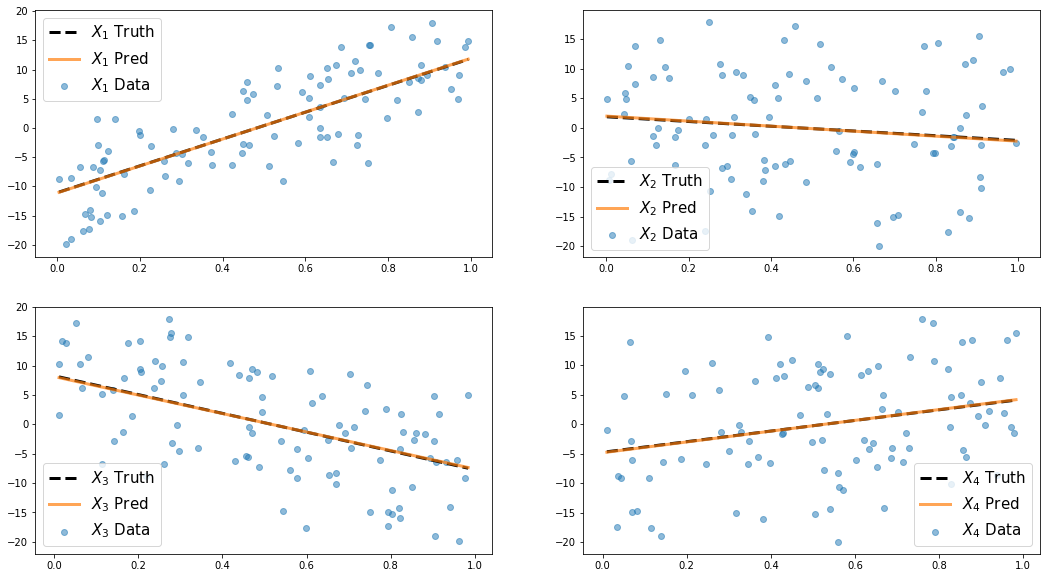

In [250]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
for i, ax in enumerate(axes.ravel()):
    x_vals = np.unique(X[:, i+1])
    ax.plot(x_vals, (x_vals * m[i+1]) - np.mean(x_vals * m[i+1]),
            'k--', alpha=1, lw=3, label='$X_{}$ Truth'.format(i+1))
    ax.plot(x_vals, (x_vals * W[i+1]) - np.mean(x_vals * W[i+1]),
            'C1-', alpha=0.7, lw=3, label='$X_{}$ Pred'.format(i+1))
    ax.scatter(X[:, i+1], y - np.mean(y), alpha=0.5, label='$X_{}$ Data'.format(i+1))
    ax.legend(loc=0, fontsize=15)

## Check against scikit-learn's implementation

Test my implementation against sklearn's. Theirs is probably a bit faster due to various optimizations and convergence checking, but, nevertheless, my basic version should get very similar results.

In [261]:
# Don't fit the intercept because it's included in X
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)
print("Weights: \n", np.round(W.ravel(), 6), "\n", np.round(lm.coef_.ravel(), 6))

Weights: 
 [  6.902094  23.08319   -4.242199 -15.739423   9.151088] 
 [  6.902094  23.08319   -4.242199 -15.739423   9.151088]
